In [103]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [86]:
#import training dataset
train= pd.read_csv("Train.csv")
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#differentiate dataset into images and labels
images = train.iloc[0:5000,1:]
labels = train.iloc[0:5000,:1]

In [88]:
#dataset info to check type of data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '6')

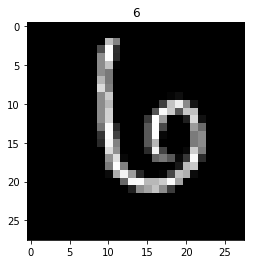

In [89]:
#visualize image
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

In [159]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0)

In [160]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1. Logistic Regression

In [161]:
#train with Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [162]:
#fit the training dataset
logisticRegr.fit(x_train, y_train)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [163]:
#prediction
predictions = logisticRegr.predict(x_test)

In [164]:
#accuracy score
score = logisticRegr.score(x_test, y_test)
print(score)

0.8826666666666667


In [70]:
#import testing dataset
test= pd.read_csv("Test.csv")

In [71]:
#finding its prediction
pred= logisticRegr.predict(test)

In [98]:
#predicted values
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

2. Naive Bayes

In [171]:
#import classifier
from sklearn.naive_bayes import BernoulliNB

In [173]:
#train the model
gnb= BernoulliNB(alpha=5.0)
gnb.fit(x_train, y_train)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=5.0, binarize=0.0, class_prior=None, fit_prior=True)

In [174]:
#prediction and accuracy
y_p= gnb.predict(x_test)
print(accuracy_score(y_test, y_p)*100)

82.13333333333334


In [189]:
#find prediction for test dataset
pred= gnb.predict(test)

3. K Neighbors

In [187]:
#import classifier and train model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [188]:
#prediction and accuracy
y_pr= neigh.predict(x_test)
print(accuracy_score(y_test, y_pr)*100)

91.26666666666667


In [191]:
#find prediction with test dataset
pre= neigh.predict(test)

4. Support Vector Machine Classifier

In [192]:
#import classifier
from sklearn import svm

In [193]:
#train model
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)
classifier.fit(x_train, y_train)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [194]:
#prediction and accuracy
y_pre= classifier.predict(x_test)
print(accuracy_score(y_test, y_pre)*100)

94.93333333333334


In [195]:
#find prediction with test dataset
predic= classifier.predict(test)

5. Decision Tree

In [129]:
#import classifier
from sklearn import tree

In [130]:
#train model
tr= tree.DecisionTreeClassifier()
tr.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
#prediction and accuracy
y_predi= tr.predict(x_test)
print(accuracy_score(y_test, y_predi)*100)

74.8


In [196]:
#find prediction with test dataset
pre= tr.predict(test)

6. Random Forest Classifier

In [132]:
#import classifier
from sklearn.ensemble import RandomForestClassifier

In [145]:
#train model
rfc= RandomForestClassifier(max_depth=9, random_state=2)
rfc.fit(x_train, y_train)

C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ayushi Agarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [146]:
#prediction and accuracy
y_predic= rfc.predict(x_test)
print(accuracy_score(y_test, y_predic)*100)

88.7


In [197]:
#find prediction with test dataset
pre= rfc.predict(test)